<a href="https://colab.research.google.com/github/sravya-paritala/StockMarketPortfolio/blob/main/Mental_health.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Data Collection**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
import pandas as pd

df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/mental_disorders_dataset.csv")
df.head()


,Patient Number,Sadness,Euphoric,Exhausted,Sleep dissorder,Mood Swing,Suicidal thoughts,Anorxia,Authority Respect,Try-Explanation,Aggressive Response,Ignore & Move-On,Nervous Break-down,Admit Mistakes,Overthinking,Sexual Activity,Concentration,Optimisim,Expert Diagnose
0,Patiant-01,Usually,Seldom,Sometimes,Sometimes,YES,YES,NO,NO,YES,NO,NO,YES,YES,YES,3 From 10,3 From 10,4 From 10,Bipolar Type-2
1,Patiant-02,Usually,Seldom,Usually,Sometimes,NO,YES,NO,NO,NO,NO,NO,NO,NO,NO,4 From 10,2 From 10,5 From 10,Depression
2,Patiant-03,Sometimes,Most-Often,Sometimes,Sometimes,YES,NO,NO,NO,YES,YES,NO,YES,YES,NO,6 From 10,5 From 10,7 From 10,Bipolar Type-1
3,Patiant-04,Usually,Seldom,Usually,Most-Often,YES,YES,YES,NO,YES,NO,NO,NO,NO,NO,3 From 10,2 From 10,2 From 10,Bipolar Type-2
4,Patiant-05,Usually,Usually,Sometimes,Sometimes,NO,NO,NO,NO,NO,NO,NO,YES,YES,YES,5 From 10,5 From 10,6 From 10,Normal


In [ ]:
df.columns


Index(['Patient Number', 'Sadness', 'Euphoric', 'Exhausted', 'Sleep dissorder',
       'Mood Swing', 'Suicidal thoughts', 'Anorxia', 'Authority Respect',
       'Try-Explanation', 'Aggressive Response', 'Ignore & Move-On',
       'Nervous Break-down', 'Admit Mistakes', 'Overthinking',
       'Sexual Activity', 'Concentration', 'Optimisim', 'Expert Diagnose'],
      dtype='object')

In [ ]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 120 entries, 0 to 119
Data columns (total 19 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Patient Number       120 non-null    object
 1   Sadness              120 non-null    object
 2   Euphoric             120 non-null    object
 3   Exhausted            120 non-null    object
 4   Sleep dissorder      120 non-null    object
 5   Mood Swing           120 non-null    object
 6   Suicidal thoughts    120 non-null    object
 7   Anorxia              120 non-null    object
 8   Authority Respect    120 non-null    object
 9   Try-Explanation      120 non-null    object
 10  Aggressive Response  120 non-null    object
 11  Ignore & Move-On     120 non-null    object
 12  Nervous Break-down   120 non-null    object
 13  Admit Mistakes       120 non-null    object
 14  Overthinking         120 non-null    object
 15  Sexual Activity      120 non-null    object
 16  Concentr

In [ ]:
print("Shape of dataset:", df.shape)

Shape of dataset: (120, 19)


# **Data Preprocessing**

In [ ]:
print(df.isnull().sum())
df.dropna(inplace=True)
df['Expert Diagnose'] = df['Expert Diagnose'].astype(str)
print("Rows, Columns:", df.shape)

Patient Number         0
Sadness                0
Euphoric               0
Exhausted              0
Sleep dissorder        0
Mood Swing             0
Suicidal thoughts      0
Anorxia                0
Authority Respect      0
Try-Explanation        0
Aggressive Response    0
Ignore & Move-On       0
Nervous Break-down     0
Admit Mistakes         0
Overthinking           0
Sexual Activity        0
Concentration          0
Optimisim              0
Expert Diagnose        0
dtype: int64
Rows, Columns: (120, 19)


# **Exploratory Data Analysis (EDA)**

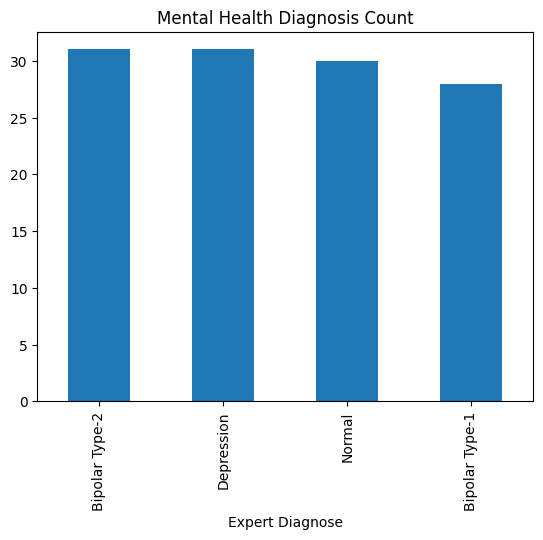

       Patient Number  Sadness Euphoric  Exhausted Sleep dissorder Mood Swing  \
count             120      120      120        120             120        120   
unique            120        4        4          4               4          2   
top        Patiant-01  Usually   Seldom  Sometimes       Sometimes         NO   
freq                1       42       46         38              44         63   

       Suicidal thoughts Anorxia Authority Respect Try-Explanation  \
count                120     120               120             120   
unique                 3       2                 2               2   
top                   NO      NO                NO              NO   
freq                  63      74                73              63   

       Aggressive Response Ignore & Move-On Nervous Break-down Admit Mistakes  \
count                  120              120                120            120   
unique                   2                2                  2              2   


In [ ]:
import matplotlib.pyplot as plt

# Count of diagnoses
df['Expert Diagnose'].value_counts().plot(kind='bar', title='Mental Health Diagnosis Count')
plt.show()

# Basic statistics for numeric features
print(df.describe())

In [ ]:
import pandas as pd

df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/mental_disorders_dataset.csv")
df.columns = df.columns.str.strip()   # remove extra spaces
print(df.columns.tolist())


['Patient Number', 'Sadness', 'Euphoric', 'Exhausted', 'Sleep dissorder', 'Mood Swing', 'Suicidal thoughts', 'Anorxia', 'Authority Respect', 'Try-Explanation', 'Aggressive Response', 'Ignore & Move-On', 'Nervous Break-down', 'Admit Mistakes', 'Overthinking', 'Sexual Activity', 'Concentration', 'Optimisim', 'Expert Diagnose']


In [ ]:
df = df.drop(columns=['Patient Number'])


# **Feature Engineering**

In [ ]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

for col in df.columns:
    df[col] = le.fit_transform(df[col].astype(str))

df.head()


,Sadness,Euphoric,Exhausted,Sleep dissorder,Mood Swing,Suicidal thoughts,Anorxia,Authority Respect,Try-Explanation,Aggressive Response,Ignore & Move-On,Nervous Break-down,Admit Mistakes,Overthinking,Sexual Activity,Concentration,Optimisim,Expert Diagnose
0,3,1,2,2,1,2,0,0,1,0,0,1,1,1,2,2,3,1
1,3,1,3,2,0,1,0,0,0,0,0,0,0,0,3,1,4,2
2,2,0,2,2,1,0,0,0,1,1,0,1,1,0,5,4,6,0
3,3,1,3,0,1,1,1,0,1,0,0,0,0,0,2,1,1,1
4,3,3,2,2,0,0,0,0,0,0,0,1,1,1,4,4,5,3


# **Model Building**

In [ ]:
from sklearn.model_selection import train_test_split

X = df.drop(columns=['Expert Diagnose'])
y = df['Expert Diagnose']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

model = LogisticRegression(max_iter=500)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))


Accuracy: 0.7916666666666666
              precision    recall  f1-score   support

           0       0.75      0.75      0.75         4
           1       1.00      0.80      0.89         5
           2       0.73      1.00      0.84         8
           3       0.80      0.57      0.67         7

    accuracy                           0.79        24
   macro avg       0.82      0.78      0.79        24
weighted avg       0.81      0.79      0.79        24



# **Model Evaluation and Interpretation**

In [ ]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Predict on test data
y_pred = model.predict(X_test)

# Accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"✅ Model Accuracy: {accuracy*100:.2f}%")

# Classification Report
print("\n📋 Classification Report:\n")
print(classification_report(y_test, y_pred))


✅ Model Accuracy: 79.17%

📋 Classification Report:

              precision    recall  f1-score   support

           0       0.75      0.75      0.75         4
           1       1.00      0.80      0.89         5
           2       0.73      1.00      0.84         8
           3       0.80      0.57      0.67         7

    accuracy                           0.79        24
   macro avg       0.82      0.78      0.79        24
weighted avg       0.81      0.79      0.79        24



/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 129504 (\N{BRAIN}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


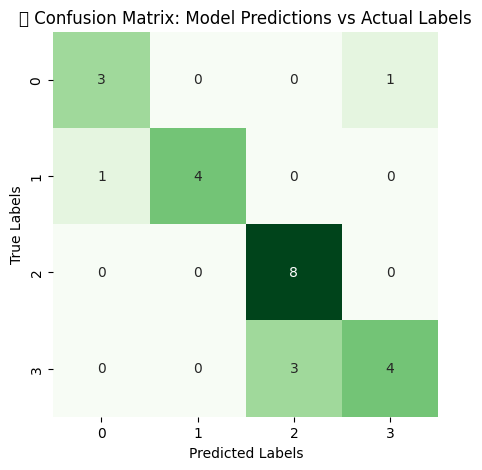

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Greens', cbar=False, square=True)
plt.title("🧠 Confusion Matrix: Model Predictions vs Actual Labels")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()


/tmp/ipython-input-2195206012.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=feature_importance, palette='mako')
/tmp/ipython-input-2195206012.py:19: UserWarning: Glyph 127775 (\N{GLOWING STAR}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 127775 (\N{GLOWING STAR}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


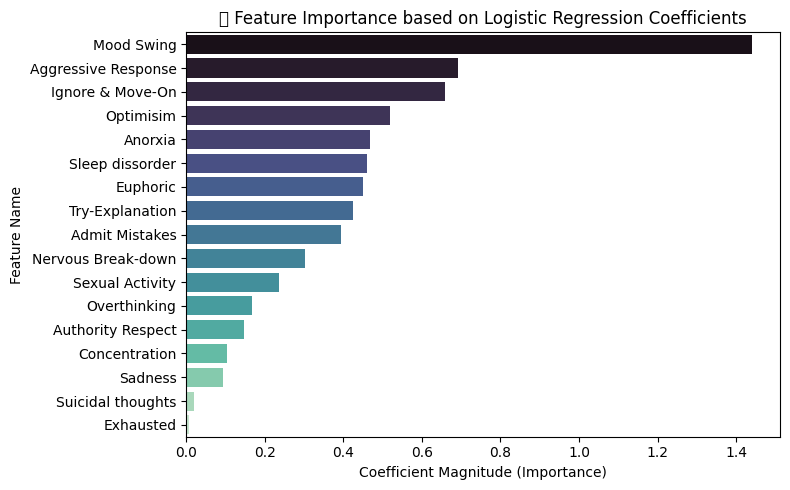

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Get feature importance using model coefficients
importance = model.coef_[0]  # coefficients for each feature
feature_importance = pd.DataFrame({
    'Feature': X.columns,
    'Importance': np.abs(importance)  # take absolute values to show strength
}).sort_values(by='Importance', ascending=False)

# Plot
plt.figure(figsize=(8,5))
sns.barplot(x='Importance', y='Feature', data=feature_importance, palette='mako')
plt.title("🌟 Feature Importance based on Logistic Regression Coefficients")
plt.xlabel("Coefficient Magnitude (Importance)")
plt.ylabel("Feature Name")
plt.tight_layout()
plt.show()


/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 129513 (\N{JIGSAW PUZZLE PIECE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


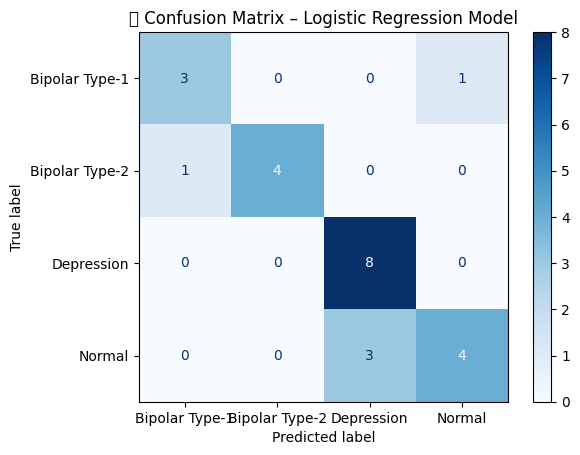

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)

# Visual display
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=le.classes_)
disp.plot(cmap='Blues')
plt.title("🧩 Confusion Matrix – Logistic Regression Model")
plt.show()


In [ ]:
import joblib

# Save model and encoder
joblib.dump(model, 'mental_health_model.pkl')
joblib.dump(le, 'label_encoder.pkl')

print("✅ Model and encoder saved successfully.")


✅ Model and encoder saved successfully.


In [ ]:
model = joblib.load('mental_health_model.pkl')
le = joblib.load('label_encoder.pkl')
